In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from elephant.phase_analysis import phase_locking_value

# FREQUENCY - MEMBRANE CAPACITANCE STUDY

Results 1 with gaussian-like intensities over channels (also id cells in the folder, possible normalization), result 2 only one channel.

In [32]:
caps = [1,5,10,15,20]
all_freqs = [[20,60,100,250,500,1000,2000,10000],[20,50, 100,250,500,1000,5000, 10000]] #20000 Hz tested but with 0 spikes for all nuclei
nuclei = ['SBC', 'GBC', 'LSO', 'MSO']
MNTBCs2MSO_weights = [0, -2.0, -4.0, -6.0, -8.0, -10.0, -12.0, -14.0, -16.0, -20.0]
weight_chosen = 3

In [33]:
n_folder = 2 #Results 1 or 2
freqs = all_freqs[n_folder-1]

/tmp/ipykernel_1388507/443283997.py:17: UserWarning: loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results2/spikes_SBC_r_freq_20000_C_1"
  mat_rates[0,n,i,j] = (np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i],caps[j]))).size
/tmp/ipykernel_1388507/443283997.py:18: UserWarning: loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results2/spikes_SBC_l_freq_20000_C_1"
  mat_rates[1,n,i,j] = (np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_l_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i],caps[j]))).size
/tmp/ipykernel_1388507/443283997.py:17: UserWarning: loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results2/spikes_SBC_r_freq_20000_C_5"
  mat_rates[0,n,i,j] = (np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i],caps[j]))).size
/tmp/ipykernel_1388507/443283997.py:18: UserWarning: loadtxt: Em

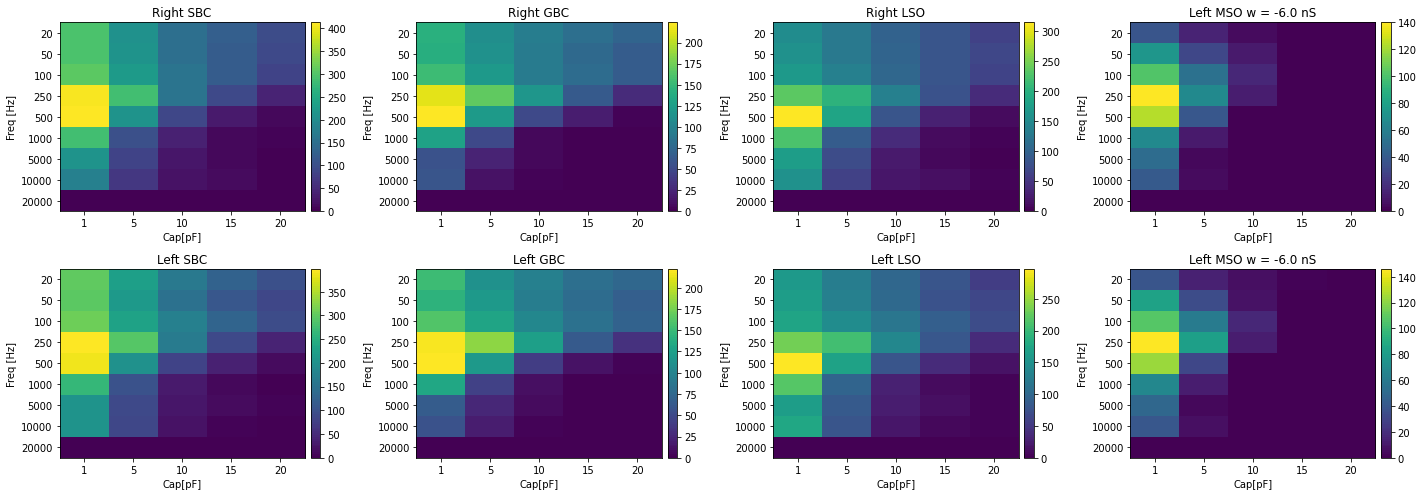

In [27]:
mat_rates = np.zeros((2, len(nuclei), len(freqs), len(caps)))
mat_indexes = np.zeros_like(mat_rates)
mat_indexes2 = np.zeros_like(mat_rates)
mat_position_indexes = np.zeros_like(mat_rates)

viridis = plt.cm.get_cmap('viridis', 100)
fig, ax = plt.subplots(2,len(nuclei), figsize=(20,7))


for n in range(len(nuclei)):
    if(n<(len(nuclei))-1):
        for i in range(len(freqs)):
            for j in range(len(caps)):
                #print(freqs[i],"Hz", caps[j], "pF")
                #print(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i],caps[j])).size)
                #print("______________")
                mat_rates[0,n,i,j] = (np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i],caps[j]))).size
                mat_rates[1,n,i,j] = (np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_l_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i],caps[j]))).size
        
        im = ax[0,n].imshow(mat_rates[0,n,:,:],cmap=viridis, aspect = 'auto')
        ticks = np.arange(len(freqs))
        ax[0,n].set_yticks(ticks)
        ax[0,n].set_yticklabels(freqs)
        ax[0,n].set_ylabel("Freq [Hz]")
        ticks = np.arange(len(caps))
        ax[0,n].set_xticks(ticks)
        ax[0,n].set_xticklabels(caps)
        ax[0,n].set_xlabel("Cap[pF]")
        ax[0,n].set_title("Right {}".format(nuclei[n]))
        cbar = fig.colorbar(im, ax=ax[0,n], pad=0.02)
        
        im = ax[1,n].imshow(mat_rates[1, n,:,:],cmap=viridis, aspect = 'auto')
        ticks = np.arange(len(freqs))
        ax[1,n].set_yticks(ticks)
        ax[1,n].set_yticklabels(freqs)
        ax[1,n].set_ylabel("Freq [Hz]")
        ticks = np.arange(len(caps))
        ax[1,n].set_xticks(ticks)
        ax[1,n].set_xticklabels(caps)
        ax[1,n].set_xlabel("Cap[pF]")
        ax[1,n].set_title("Left {}".format(nuclei[n]))
        cbar = fig.colorbar(im, ax=ax[1,n], pad=0.02)
    else:
        for i in range(len(freqs)):
            for j in range(len(caps)):
                mat_rates[0,n,i,j] = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/rates_{}_r_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i],caps[j]))[weight_chosen]
                mat_rates[1,n,i,j] = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/rates_{}_l_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i],caps[j]))[weight_chosen]
                
        im = ax[0,n].imshow(mat_rates[0, n,:,:],cmap=viridis, aspect = 'auto')
        ticks = np.arange(len(freqs))
        ax[0,n].set_yticks(ticks)
        ax[0,n].set_yticklabels(freqs)
        ax[0,n].set_ylabel("Freq [Hz]")
        ticks = np.arange(len(caps))
        ax[0,n].set_xticks(ticks)
        ax[0,n].set_xticklabels(caps)
        ax[0,n].set_xlabel("Cap[pF]")
        ax[0,n].set_title("Left {} w = {} nS".format(nuclei[n], MNTBCs2MSO_weights[weight_chosen]))
        cbar = fig.colorbar(im, ax=ax[0,n], pad=0.02)
        
        im = ax[1,n].imshow(mat_rates[1, n,:,:],cmap=viridis, aspect = 'auto')
        ticks = np.arange(len(freqs))
        ax[1,n].set_yticks(ticks)
        ax[1,n].set_yticklabels(freqs)
        ax[1,n].set_ylabel("Freq [Hz]")
        ticks = np.arange(len(caps))
        ax[1,n].set_xticks(ticks)
        ax[1,n].set_xticklabels(caps)
        ax[1,n].set_xlabel("Cap[pF]")
        ax[1,n].set_title("Left {} w = {} nS".format(nuclei[n], MNTBCs2MSO_weights[weight_chosen]))
        cbar = fig.colorbar(im, ax=ax[1,n], pad=0.02)
        
fig.tight_layout()



# Phase-locking values

___________________
Tone: 20
Sig: [0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.
 0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.
 0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.
 0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6
 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.
 0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.
 0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.
 0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.
 0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6
 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.
 0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0.  0.  0.6 1.  1.  0.6 0.  0.  0.
 0.  0. ]
Sig reshaped: [[0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0. ]
 [0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0. ]
 [0.  0.6 1.  1.  0.6 0.  0.  0.  0.  0. ]
 [0.  0.6 1.  1.  0

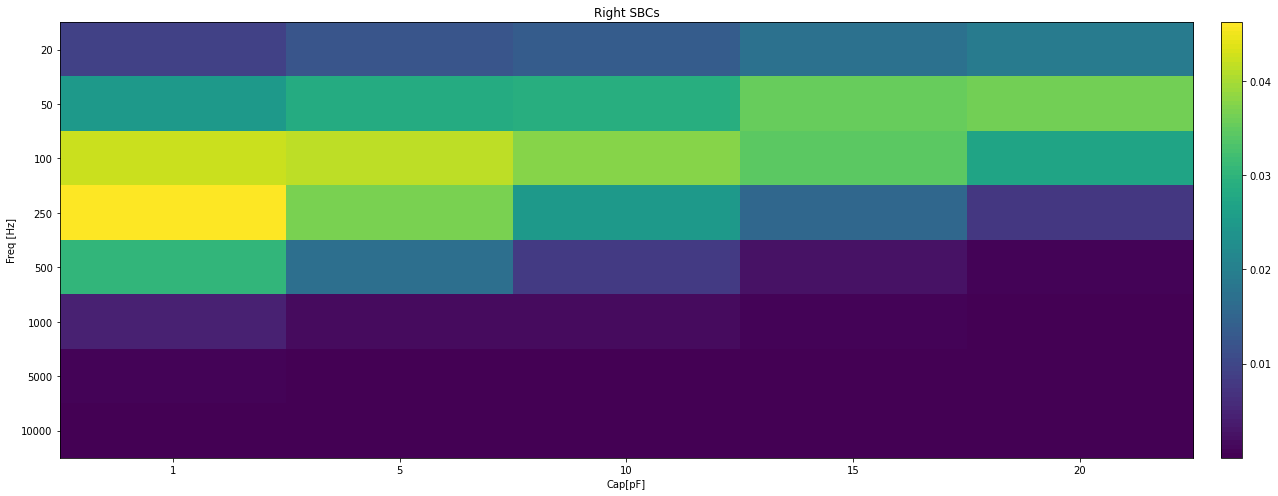

In [42]:
fig,ax = plt.subplots(1, figsize=(20,7))

length = 10 #number of bins in which subdivide each period
mat = np.zeros((len(freqs), len(caps)))
mat2 = np.zeros((len(freqs), len(caps)))
means = np.zeros((len(freqs), len(caps), length))
#k = np.zeros((periods, length))

for i in range(len(freqs)):
    periods = freqs[i]
    bin_dim = 1000/(periods*length)
    t = np.arange(0,1000,bin_dim)
    sig = np.clip(np.sin(2*np.pi*freqs[i]*t/1000),0, None) #sine (simulated signal)
    
    if(i==0):
        print("___________________")
        print("Tone:", freqs[i])
        print("Sig:", np.round(sig,1))
    
    sig = sig.reshape(periods, length)
    
    if(i==0):
        print("Sig reshaped:", np.round(sig,1))
        print("Period:", round(1000/freqs[i],2), 'ms')
        print("Bin Dimension:", bin_dim, "ms")

    for j in range(len(caps)):
        if(i==0):
            print("_______")
            print("Cap:", caps[j])
        x = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder,'SBC', freqs[i], caps[j])) #real signal (times spike recorder)
        s, bins = np.histogram(x,np.arange(0,1000+bin_dim,bin_dim))
        s = s.reshape(periods, length)
        s = s.astype(np.float32)
        
        for k in range(periods):
            if(s[k].max()!=0):
                s[k] = s[k]/s[k].max()
        
        means[i,j] = s.mean(axis = 0)
        
        p = phase_locking_value(s, sig)
        mat[i,j]  = np.max(p)
        mat2[i,j]  = np.max(p) - np.mean(p)
        if(i==0):
            print("s:\n" ,np.round(s,2))
            print("means", np.round(means[i,j],1))
            print("Indexes:", p)
            print("Score", mat2[i,j])

im = ax.imshow(mat2,cmap=viridis, aspect = 'auto')
ticks = np.arange(len(freqs))
ax.set_yticks(ticks)
ax.set_yticklabels(freqs)
ax.set_ylabel("Freq [Hz]")
ticks = np.arange(len(caps))
ax.set_xticks(ticks)
ax.set_xticklabels(caps)
ax.set_xlabel("Cap[pF]")
ax.set_title("Right SBCs")
fig.tight_layout()
cbar = fig.colorbar(im, pad=0.02)

/tmp/ipykernel_1388507/3162723977.py:33: UserWarning: loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results2/spikes_GBC_r_freq_1000_C_20"
  x = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i], caps[j])) #real signal (times spike recorder)
/tmp/ipykernel_1388507/3162723977.py:33: UserWarning: loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results2/spikes_GBC_r_freq_5000_C_20"
  x = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i], caps[j])) #real signal (times spike recorder)
/tmp/ipykernel_1388507/3162723977.py:33: UserWarning: loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results2/spikes_GBC_r_freq_10000_C_20"
  x = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i], caps[j])) #real signal (times spike recorder)


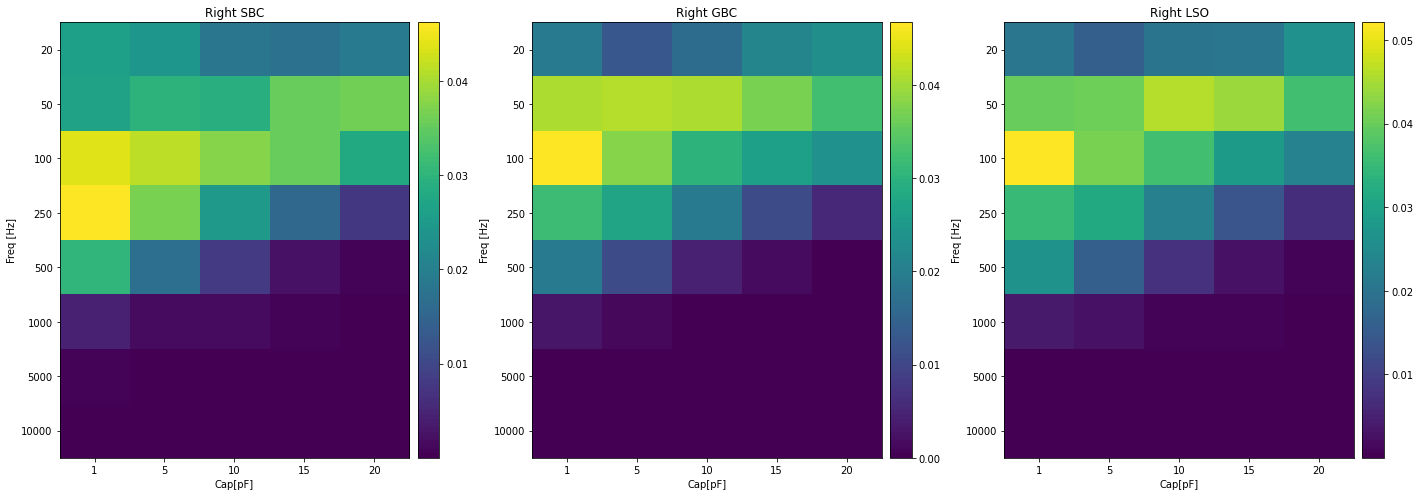

In [61]:
fig, ax = plt.subplots(1,len(nuclei)-1, figsize=(20,7))

length = 10 #number of bins in which subdivide each period
mat = np.zeros((len(freqs), len(caps)))
mat2 = np.zeros((len(freqs), len(caps)))
means = np.zeros((len(freqs), len(caps), length))


for n in range(len(nuclei)-1):
    if(n<(len(nuclei))-1):
        #print("NUCLEUS:{}".format(nuclei[n]))
        #print("________________________________________________________________\n")
        for i in range(len(freqs)):
            periods = freqs[i]
            bin_dim = 1000/(periods*length)
            t = np.arange(0,1000,bin_dim)
            sig = np.clip(np.sin(2*np.pi*freqs[i]*t/1000),0, None) #sine (simulated signal)

            #print("Tone:", freqs[i])
            #print("___________________")
            #print("Sig:", np.round(sig,1), "\n")

            sig = sig.reshape(periods, length)

            #print("Sig reshaped:", np.round(sig,1), "\n")
            #print("Period:", round(1000/freqs[i],2), 'ms')
            #print("Bin Dimension:", bin_dim, "ms")

            for j in range(len(caps)):
                #print("___________________")
                #print("Capacity:{}".format(caps[j]))
                
                x = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, nuclei[n], freqs[i], caps[j])) #real signal (times spike recorder)
                s, bins = np.histogram(x,np.arange(0,1000+bin_dim,bin_dim))
                s = s.reshape(periods, length)
                s = s.astype(np.float32)

                for k in range(periods-1):
                    if(s[k].max()!=0):
                        s[k] = s[k]/s[k].max()
                
                means[i,j] = s.mean(axis = 0)

                p = phase_locking_value(s, sig)
                mat[i,j]  = np.max(p)
                mat2[i,j]  = np.max(p) - np.mean(p)
                
                #print("s:\n" ,np.round(s,2))
                #print("means", np.round(means[i,j],1))
                #print("Indexes:", p)
                #print("Score", mat2[i,j], "\n")

    im = ax[n].imshow(mat2,cmap=viridis, aspect = 'auto')
    ticks = np.arange(len(freqs))
    ax[n].set_yticks(ticks)
    ax[n].set_yticklabels(freqs)
    ax[n].set_ylabel("Freq [Hz]")
    ticks = np.arange(len(caps))
    ax[n].set_xticks(ticks)
    ax[n].set_xticklabels(caps)
    ax[n].set_xlabel("Cap[pF]")
    ax[n].set_title("Right {}".format(nuclei[n]))
    fig.tight_layout()
    cbar = fig.colorbar(im, ax=ax[n], pad=0.02)

# FIRST PLV INDEX

/tmp/ipykernel_1159472/3046791922.py:46: UserWarning:loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results/spikes_MSO_r_freq_250_C_20"
/tmp/ipykernel_1159472/3046791922.py:46: UserWarning:loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results/spikes_MSO_r_freq_500_C_15"
/tmp/ipykernel_1159472/3046791922.py:46: UserWarning:loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results/spikes_MSO_r_freq_500_C_20"
/tmp/ipykernel_1159472/3046791922.py:46: UserWarning:loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results/spikes_MSO_r_freq_1000_C_15"
/tmp/ipykernel_1159472/3046791922.py:46: UserWarning:loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results/spikes_MSO_r_freq_1000_C_20"
/tmp/ipykernel_1159472/3046791922.py:46: UserWarning:loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results/spikes_MSO_r_freq_2000_C_10"
/tmp/ipykernel_1159472/3046791922.py:46: UserWarning:loadtxt: Empty input file: "/home/ubun

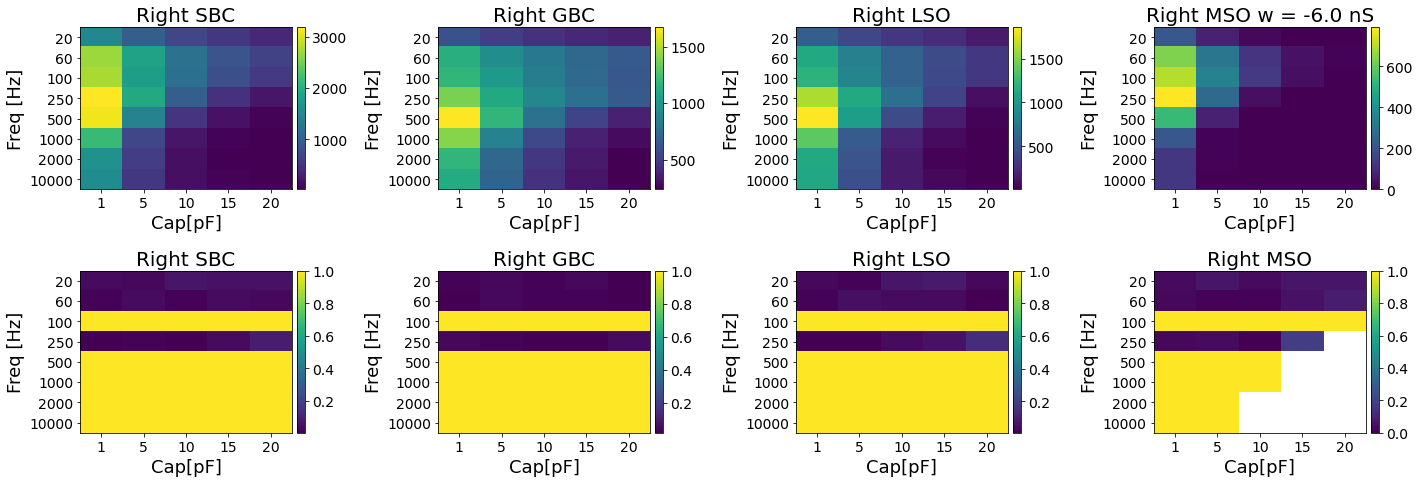

In [ ]:
mat_rates = np.zeros((len(freqs), len(caps)))
mat_indexes = np.zeros((len(freqs), len(caps)))
viridis = plt.cm.get_cmap('viridis', 100)
fig, ax = plt.subplots(2,len(nuclei), figsize=(20,7))
MNTBCs2MSO_weights = [0, -2.0, -4.0, -6.0, -8.0, -10.0, -12.0, -14.0, -16.0, -20.0]
w = 3

for n in range(len(nuclei)):
    if(n<(len(nuclei))-1):
        for i in range(len(freqs)):
            for j in range(len(caps)):
                mat_rates[i,j] = len(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results/spikes_{}_r_freq_{}_C_{}'.format(nuclei[n], freqs[i],caps[j])))
        im = ax[0,n].imshow(mat_rates,cmap=viridis, aspect = 'auto')
        ticks = np.arange(len(freqs))
        ax[0,n].set_yticks(ticks)
        ax[0,n].set_yticklabels(freqs)
        ax[0,n].set_ylabel("Freq [Hz]")
        ticks = np.arange(len(caps))
        ax[0,n].set_xticks(ticks)
        ax[0,n].set_xticklabels(caps)
        ax[0,n].set_xlabel("Cap[pF]")
        ax[0,n].set_title("Right {}".format(nuclei[n]))
        fig.tight_layout()
        cbar = fig.colorbar(im, ax=ax[0,n], pad=0.02)
    else:
        for i in range(len(freqs)):
            for j in range(len(caps)):
                mat_rates[i,j] = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results/rates_{}_r_freq_{}_C_{}'.format(nuclei[n], freqs[i],caps[j]))[w]
        im = ax[0,n].imshow(mat_rates,cmap=viridis, aspect = 'auto')
        ticks = np.arange(len(freqs))
        ax[0,n].set_yticks(ticks)
        ax[0,n].set_yticklabels(freqs)
        ax[0,n].set_ylabel("Freq [Hz]")
        ticks = np.arange(len(caps))
        ax[0,n].set_xticks(ticks)
        ax[0,n].set_xticklabels(caps)
        ax[0,n].set_xlabel("Cap[pF]")
        ax[0,n].set_title("Right {} w = {} nS".format(nuclei[n], MNTBCs2MSO_weights[w]))
        fig.tight_layout()
        cbar = fig.colorbar(im, ax=ax[0,n], pad=0.02)

for n in range(len(nuclei)):
    if(n<(len(nuclei))):
        for i in range(len(freqs)):
            for j in range(len(caps)):
                x = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results/spikes_{}_r_freq_{}_C_{}'.format(nuclei[n], freqs[i],caps[j]))
                p = 0
                for l in range(len(x)):
                    p += np.exp(1j*2*np.pi*freqs[i]*x[l])
                if(len(x) == 0):
                    p = np.nan
                else:
                    p = p/len(x)
                mat_indexes[i,j]  = np.abs(p)
                    
        im = ax[1,n].imshow(mat_indexes,cmap=viridis, aspect = 'auto')
        ticks = np.arange(len(freqs))
        ax[1,n].set_yticks(ticks)
        ax[1,n].set_yticklabels(freqs)
        ax[1,n].set_ylabel("Freq [Hz]")
        ticks = np.arange(len(caps))
        ax[1,n].set_xticks(ticks)
        ax[1,n].set_xticklabels(caps)
        ax[1,n].set_xlabel("Cap[pF]")
        ax[1,n].set_title("Right {}".format(nuclei[n]))
        fig.tight_layout()
        cbar = fig.colorbar(im, ax=ax[1,n], pad=0.02)
        


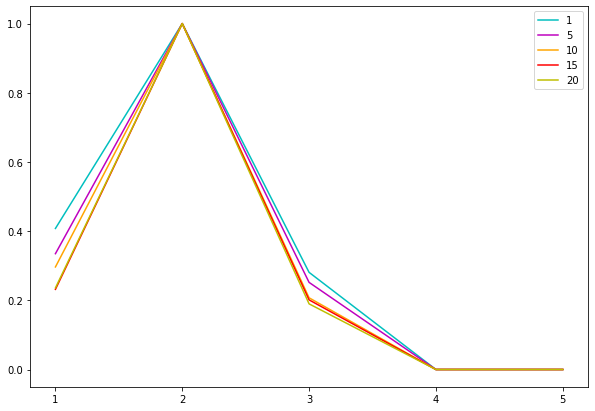

In [8]:
fig, ax = plt.subplots(1, figsize = (10,7))
colors = ('c', 'm', 'orange', 'r', 'y')
for i in range(len(caps)):
    ax.plot(np.arange(length)+1, means[0,i,:]/np.max(means[0,i,:]), color = colors[i], label = caps[i])
ax.legend()
ax.set_xticks(np.arange(length)+1)

AttributeError: 'AxesSubplot' object has no attribute 'set_legend'

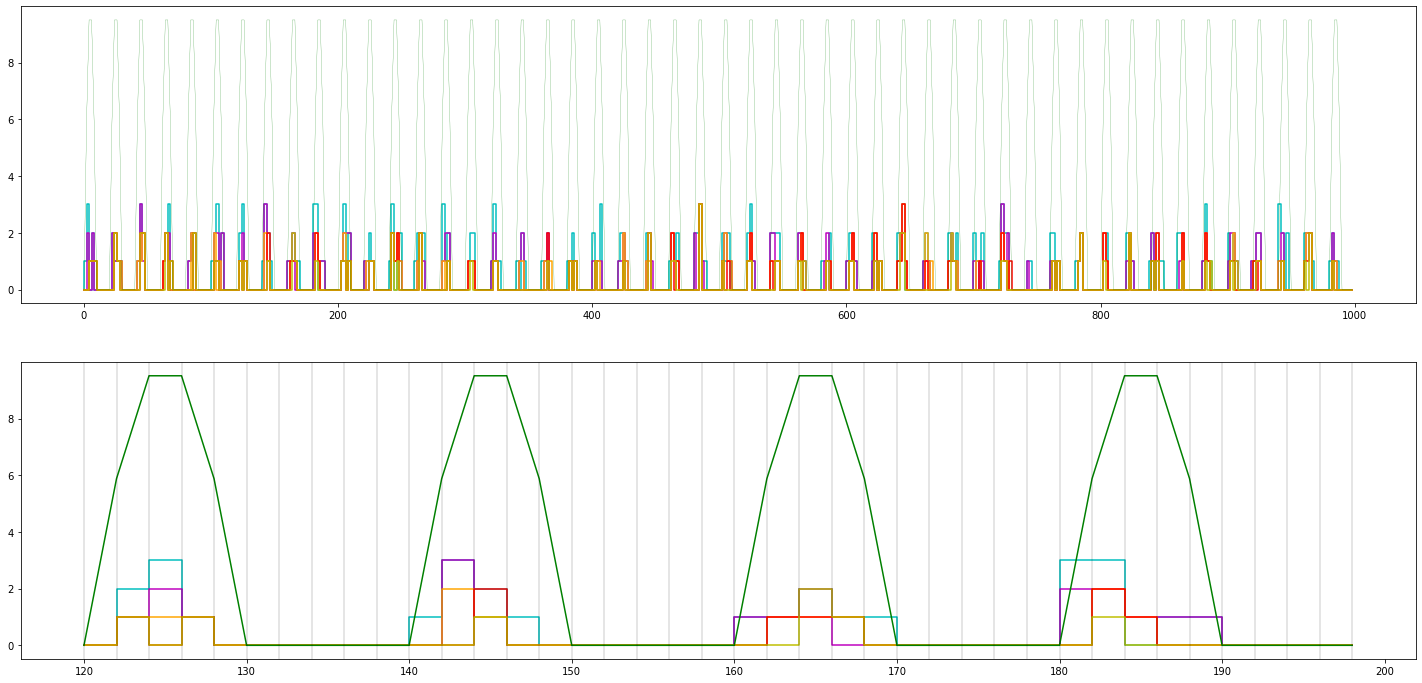

In [183]:
length = 10
tone = 50
periods = tone

bin_dim = 1000/(periods*length)

fig, ax = plt.subplots(2,1, figsize = (25,12))
colors = ('c', 'm', 'orange', 'r', 'y')

start = 60
zoom = 40

for i in range(len(caps)):
    v = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder,'SBC', tone,caps[i]))
    s, bins = np.histogram(v,np.arange(0,1000+bin_dim,bin_dim))
    ax[0].step(bins[:-1],s, color  = colors[i])
    
    
    ax[1].step(bins[start:start+zoom],s[start:start+zoom], color = colors[i])

t = np.arange(0,1000,bin_dim)
sig = np.clip(10*np.sin(2*np.pi*tone*t/1000),0, None)
ax[0].plot(t, sig, color = 'g', linewidth = '0.2')


ax[1].plot(t[start:start+zoom], sig[start:start+zoom], color = 'g')
for i in range(zoom):
    ax[1].axvline(bins[start+i], linewidth = '0.2', color = 'k')
    
ax[1].set_legend(colors, caps)

s = s.reshape(periods, length)
sig = sig.reshape(periods, length)
p = phase_locking_value(s, sig)

print("Period:", round(1000/tone,2), 'ms')
print("Bin Dimension:", bin_dim, "ms")
print("Phase Discretization Intervals:", length)
print("Indexes:", p)

In [25]:
plt.figure()
plt.scatter(v[np.where(v<100)], np.ones_like(v[np.where(v<100)]))
plt.scatter(v[np.where((v>200)&(v<=300))]-200, 0.9*np.ones_like(v[np.where((v>200)&(v<=300))]), color = 'g')
plt.scatter(v[np.where((v>700)&(v<=800))]-700, 0.8*np.ones_like(v[np.where((v>700)&(v<=800))]), color = 'c')
plt.scatter(v[np.where(v>900)]-900, 0.7*np.ones_like(v[np.where(v>900)]), color = 'r')
plt.xlim(0, 100)
plt.yticks(np.arange(0.7,1,0.1), labels = ["900-1000", "700-800", "200-300", "0-100"])
#plt.show()

NameError: name 'v' is not defined

<Figure size 432x288 with 0 Axes>

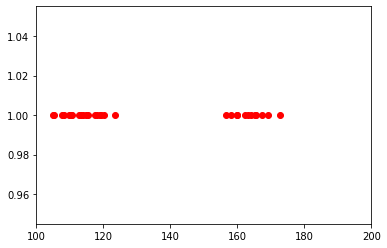

In [125]:
plt.scatter(v, np.ones_like(v), color = 'r')
plt.xlim(100, 200)
plt.show()

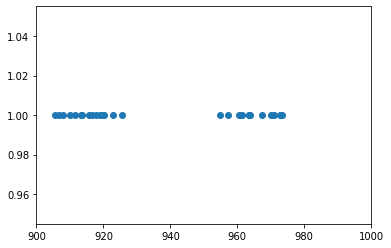

In [118]:
plt.figure()
plt.scatter(v, np.ones_like(v))
plt.xlim(900, 1000)
plt.show()

In [ ]:
np.arange(0,1000+bin_dim,bin_dim)

## DURATION AND BIN FIXED

In [ ]:
tone = 1000
periods = tone

bin_dim = 0.2

v = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results2/spikes_{}_r_freq_{}_C_{}'.format('SBC', tone,5))


s, bins = np.histogram(v,np.arange(0,1000+bin_dim,bin_dim))
fig, ax = plt.subplots(2,1, figsize = (25,12))
ax[0].step(bins[:-1],s)

t = np.arange(0,1000,bin_dim)
sig = np.clip(10*np.sin(2*np.pi*tone*t/1000),0, None)
ax[0].plot(t, sig, color = 'g')

zoom = 100
ax[1].step(bins[:zoom],s[:zoom])
ax[1].plot(t[:zoom], sig[:zoom], color = 'g')
for i in range(zoom):
    ax[1].axvline(bins[i], linewidth = '0.2', color = 'k')


length = int(len(t)/periods)
s = s[0:int(periods*length)]
sig = sig[0:int(periods*length)]

s = s.reshape(periods, length)
sig = sig.reshape(periods, length)
p = phase_locking_value(s, sig)

print("Bin Dimension:", bin_dim, "ms")
print("Period:", round(1000/tone,2), 'ms')
print("Phase Discretization Intervals:", length)
print("Indexes:", p)

# Attempt 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.signal  
import scipy.interpolate as scp

def func1(x, a, b, c):
    return(-b/(2*a)*(x**2) + b * x + c)

def inv_func1(y, a, b, c):
    x1 = a + (-a*(math.sqrt(abs(b**2 + 2*b*(c-y)/a))/b))
    x2 = a - (-a*(math.sqrt(abs(b**2 + 2*b*(c-y)/a))/b))
    #print(x1, x2)
    if(a>=0):
        return(x1)
    else:
        return(x2)

In [24]:
caps = [1,5,10,15,20]
freqs1 = [20,60,100,250,500,1000,2000,10000,20000]

length = 100
target = 200

n_folder = 2

freqs2 = [20,50,100,250,500,1000,2000,5000,10000,20000]

/tmp/ipykernel_1325170/69911260.py:6: UserWarning: loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results2/spikes_SBC_r_freq_20000_C_1"
  s[i,j] = (np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, 'SBC', freqs2[i],caps[j]))).size
/tmp/ipykernel_1325170/69911260.py:6: UserWarning: loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results2/spikes_SBC_r_freq_20000_C_5"
  s[i,j] = (np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, 'SBC', freqs2[i],caps[j]))).size
/tmp/ipykernel_1325170/69911260.py:6: UserWarning: loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/Results2/spikes_SBC_r_freq_20000_C_10"
  s[i,j] = (np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, 'SBC', freqs2[i],caps[j]))).size
/tmp/ipykernel_1325170/69911260.py:6: UserWarning: loadtxt: Empty input file: "/home/ubuntu/cosyne-tutorial-2022/R

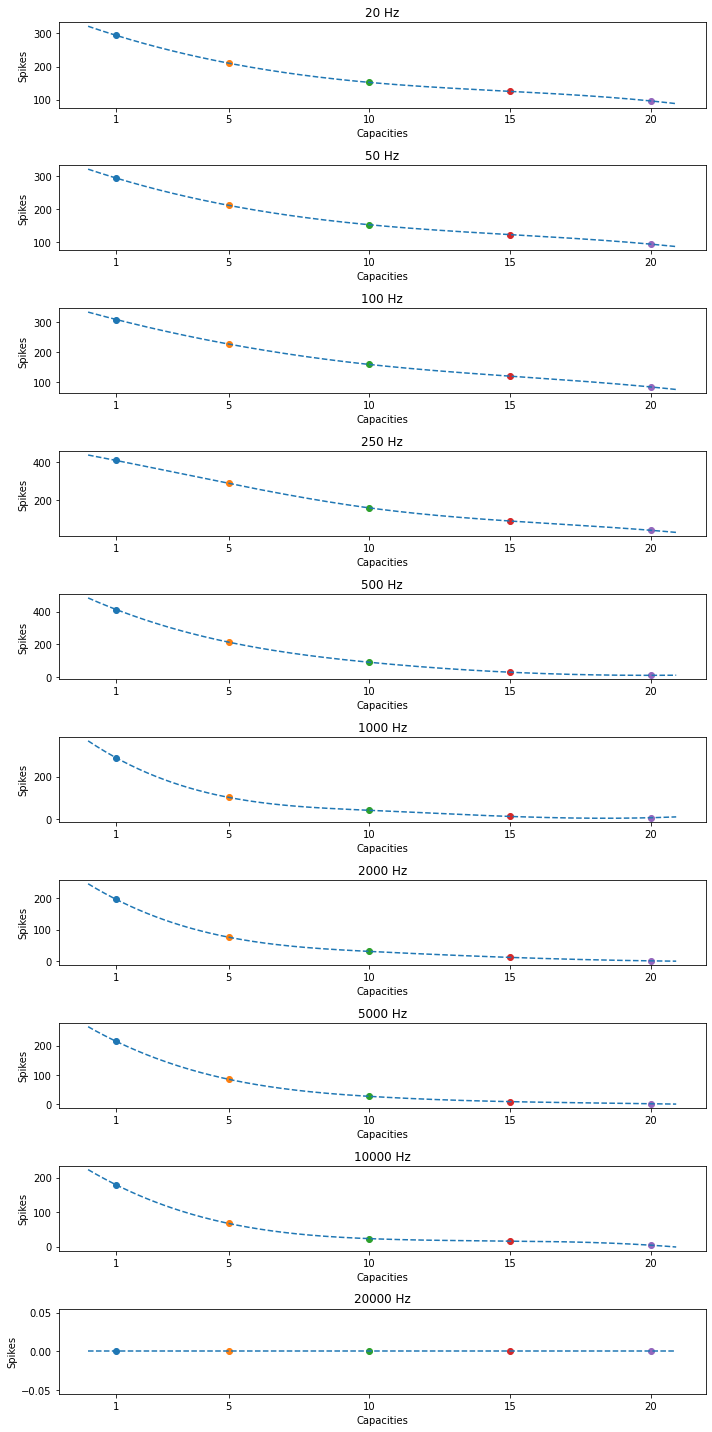

In [28]:
fig, ax = plt.subplots(len(freqs2), figsize = (10,20))
s = np.zeros((len(freqs2), len(caps)))
             
for i in range(len(freqs2)):
    for j in range(len(caps)):
        s[i,j] = (np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder, 'SBC', freqs2[i],caps[j]))).size
        ax[i].scatter(caps[j], s[i,j])
    cs = scp.CubicSpline(caps, s[i])
    xs = np.arange(0,21,0.1)
    ax[i].plot(xs, cs(xs), '--')
    ax[i].set_ylabel("Spikes")
    ax[i].set_xlabel("Capacities")
    ax[i].set_xticks(caps)
    ax[i].set_title("{} Hz".format(freqs2[i]))
fig.tight_layout()

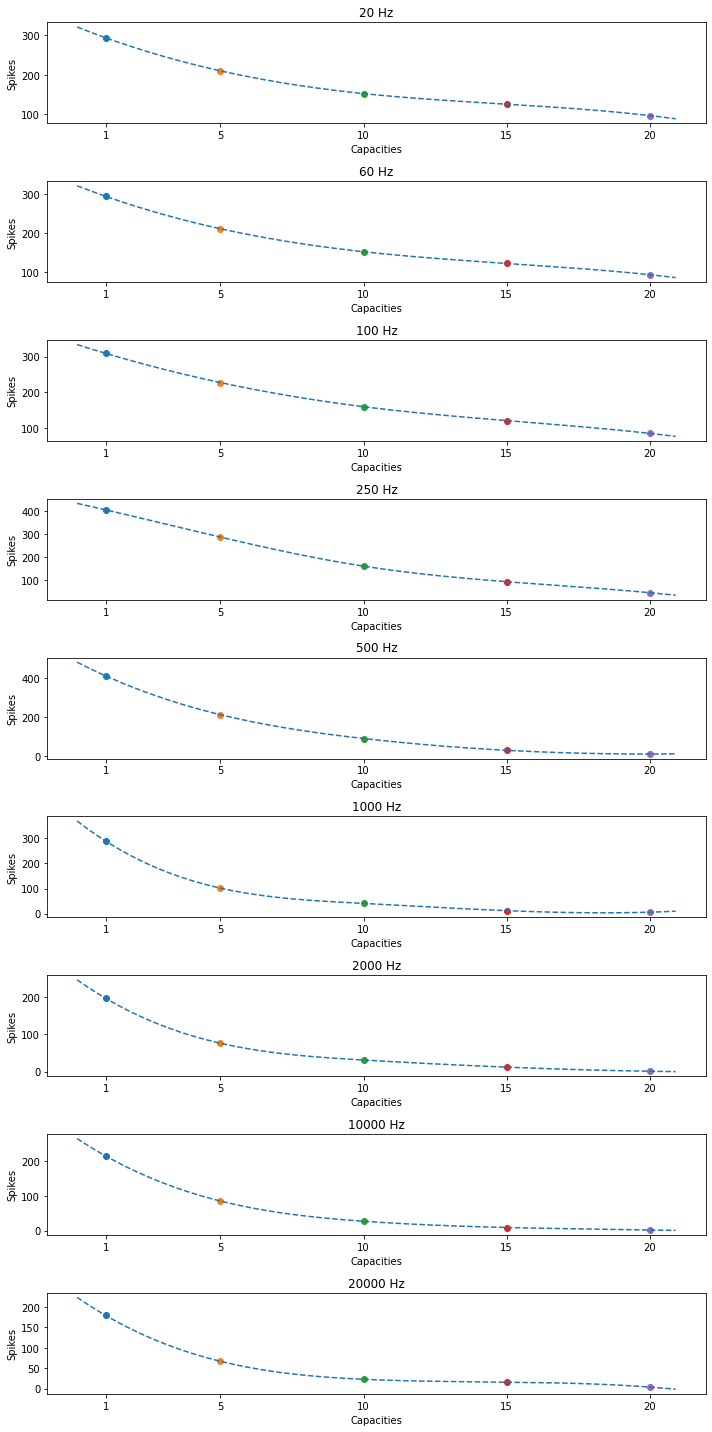

In [33]:
fig, ax = plt.subplots(len(freqs), figsize = (10,20))
s = np.zeros((len(freqs), len(caps)))
             
for i in range(len(freqs)):
    for j in range(len(caps)):
        s[i,j] = (np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(2, 'SBC', freqs2[i],caps[j]))).size
        ax[i].scatter(caps[j], s[i,j])
    cs= scp.CubicSpline(caps, s[i])
    xs = np.arange(0,21,0.1)
    ax[i].plot(xs, cs(xs), '--')
    ax[i].set_ylabel("Spikes")
    ax[i].set_xlabel("Capacities")
    ax[i].set_xticks(caps)
    ax[i].set_title("{} Hz".format(freqs[i]))
fig.tight_layout()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.signal  

In [3]:
caps = [1,5,10,15,20]
freqs = [20,50,100,250,500,1000]
nuclei = ['SBC', 'GBC', 'LSO', 'MSO']

length = 100
n_folder = 2

In [11]:
stds = np.zeros((len(freqs), len(caps), freqs[-1]))
maxs = np.zeros((len(freqs), len(caps), freqs[-1]))
corr_plt = np.zeros((len(freqs),len(caps), freqs[-1], 2*length-1))

for i in range(len(freqs)):
    periods = freqs[i]
    bin_dim = 1000/(periods*length)
    t = np.arange(0,1000,bin_dim)
    sig = np.clip(np.sin(2*np.pi*freqs[i]*t/1000),0, None)
    sig = sig.reshape(periods, length)
    print("___________________")
    print("Tone:", freqs[i])
    print("Period:", round(1000/freqs[i],2), 'ms')
    print("Bin Dimension:", bin_dim, "ms")

    for j in range(len(caps)):
        
        x = np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/Results{}/spikes_{}_r_freq_{}_C_{}'.format(n_folder,'SBC', freqs[i], caps[j]))
        s, bins = np.histogram(x,np.arange(0,1000+bin_dim,bin_dim))
        s = s.reshape(periods, length)
        s = s.astype(np.float32)
        
        for k in range(periods):

            if(s[k].max() != 0):
                s[k] = s[k]/s[k].max()
            corr = scipy.signal.correlate(sig[0],s[k])
            corr_plt[i,j,k] = corr
            
            if(np.max(corr)!=0):
                stds[i,j,k] = np.std(corr)**2/np.mean(corr)
                maxs[i,j,k] = np.argmax(corr)
            else:
                stds[i,j,k] = np.nan
                maxs[i,j,k] = np.nan

___________________
Tone: 20
Period: 50.0 ms
Bin Dimension: 0.5 ms
___________________
Tone: 50
Period: 20.0 ms
Bin Dimension: 0.2 ms
___________________
Tone: 100
Period: 10.0 ms
Bin Dimension: 0.1 ms
___________________
Tone: 250
Period: 4.0 ms
Bin Dimension: 0.04 ms
___________________
Tone: 500
Period: 2.0 ms
Bin Dimension: 0.02 ms
___________________
Tone: 1000
Period: 1.0 ms
Bin Dimension: 0.01 ms


In [14]:
maxs[-1,0,:]

array([ nan,  nan,  78.,  nan,  nan,  nan,  nan,  87.,  nan,  77.,  nan,
        nan,  78.,  nan,  73.,  nan,  nan,  nan,  nan,  92.,  nan,  nan,
        nan,  80.,  nan,  72.,  nan,  nan,  nan,  92.,  nan,  nan,  77.,
        nan,  72.,  nan,  nan,  nan,  nan,  nan,  78.,  nan,  73.,  nan,
        nan,  nan,  83.,  nan,  nan,  nan,  nan,  nan,  nan,  95.,  nan,
        nan,  nan,  nan,  76.,  nan,  nan,  nan,  86.,  nan,  nan,  77.,
        nan,  nan,  83.,  nan,  90.,  nan,  76.,  nan,  nan,  nan,  nan,
       101.,  nan,  82.,  84.,  nan,  94.,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  91.,  nan,  nan,  nan,  91.,  nan,  93.,  nan,  90.,
        nan,  nan,  nan,  nan,  nan,  91.,  nan,  nan,  91.,  nan,  89.,
        nan, 110.,  82.,  nan,  nan,  nan,  84.,  nan,  nan,  87.,  nan,
        82.,  nan,  nan,  nan, 105.,  nan,  93.,  nan,  nan,  92.,  nan,
        nan,  nan,  nan,  nan,  89.,  nan,  81.,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan, 102.,  nan,  nan,  n

In [15]:
stds[-1,0,:]

array([       nan,        nan, 1.21551391,        nan,        nan,
              nan,        nan, 0.62575456,        nan, 1.12114132,
              nan,        nan, 1.22805944,        nan, 0.62575456,
              nan,        nan,        nan,        nan, 0.62575456,
              nan,        nan,        nan, 0.62575456,        nan,
       0.62575456,        nan,        nan,        nan, 0.62575456,
              nan,        nan, 1.18355188,        nan, 0.62575456,
              nan,        nan,        nan,        nan,        nan,
       0.62575456,        nan, 0.62575456,        nan,        nan,
              nan, 0.62575456,        nan,        nan,        nan,
              nan,        nan,        nan, 0.62575456,        nan,
              nan,        nan,        nan, 0.62575456,        nan,
              nan,        nan, 0.62575456,        nan,        nan,
       0.62575456,        nan,        nan, 0.62575456,        nan,
       0.62575456,        nan, 0.62575456,        nan,        

In [38]:
corr_plt[-1,0,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0.5, 0, 'Capacity [pF]')

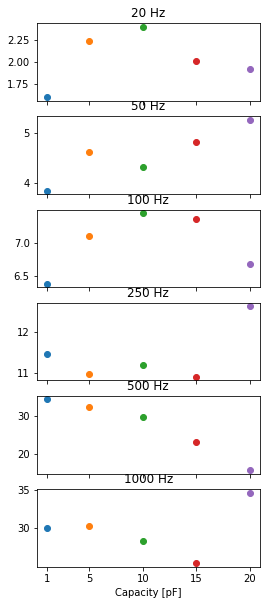

In [36]:
fig,ax = plt.subplots(len(freqs),figsize = (4,10), sharex = True)
for i in range(len(freqs)):
    ax[i].set_xticks(caps)
    ax[i].set_title("{} Hz".format(freqs[i]))
    for j in range(len(caps)):
        ax[i].plot(caps[j],np.nanstd(maxs[i,j,:freqs[i]]), '-o')
ax[-1].set_xlabel("Capacity [pF]")  

Text(0.5, 0, 'Capacity [pF]')

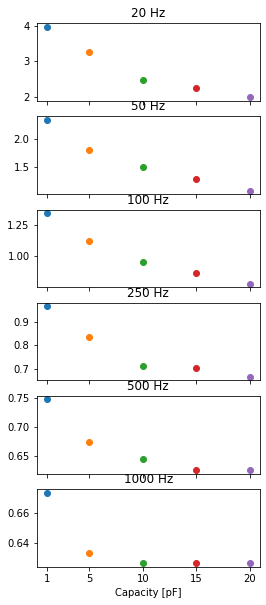

In [37]:
fig,ax = plt.subplots(len(freqs),figsize = (4,10), sharex = True)
for i in range(len(freqs)):
    ax[i].set_xticks(caps)
    ax[i].set_title("{} Hz".format(freqs[i]))
    for j in range(len(caps)):
        ax[i].plot(caps[j],np.nanmean(stds[i,j,:freqs[i]]), 'o')
ax[-1].set_xlabel("Capacity [pF]")       

In [48]:
corrz = np.zeros((len(freqs),len(caps), 2*length-1))
for i in range(len(freqs)):
    for j in range(len(caps)):
        for k in range(freqs[i]):
            if(np.max(corr_plt[i,j,k])!=0):
                corrz[i,j] = corrz[i,j] + corr_plt[i,j,k]/np.max(corr_plt[i,j,k])
            #else:
                #print(caps[j], "pF", "period", i)
        corrz[i,j] = corrz[i,j]/freqs[i]

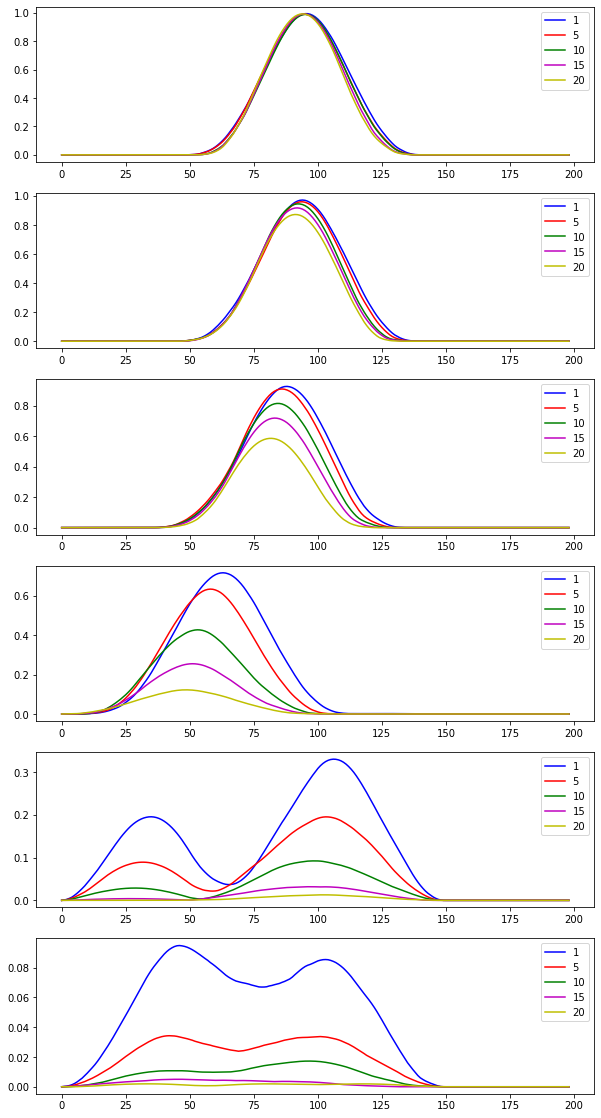

In [49]:
colors = ('b', 'r', 'g', 'm', 'y')
fig,ax = plt.subplots(len(freqs),figsize = (10,20))
for i in range(len(freqs)):
    for j in range(len(caps)):
        ax[i].plot(np.arange(len(corrz[i,j])), corrz[i,j], color = colors[j], label = caps[j])
    ax[i].legend()

In [40]:
len(corr_plt[-1,1,0])

199

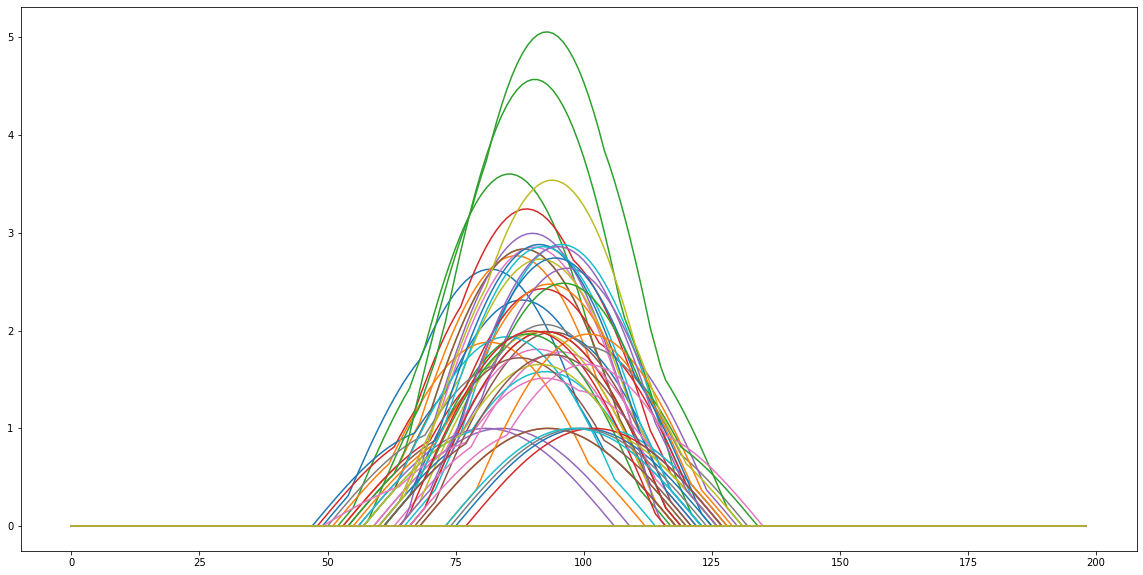

In [61]:
fig, ax = plt.subplots(1,figsize = (20,10))
for i in range(2*length-1):
    ax.plot(np.arange(2*length-1), corr_plt[1,3,i])